# Redes Neuronales Artificiales

In [1]:
%matplotlib inline

Las redes Neuronales Articiciales (En inglés Artificial Neural Networks -ANNs) son una clase de algoritmos bioinspirados con capacidad de tratar con muchos problemas diferentes en el ambioto del Machine Learning. 

Las ANNs intentan emular algunos de los principios de las redes neuronales biológicas, por lo que basan su estructura en una combinación de muchas unidades básicas (neuronas) llamadas perceptrones.

![alt text](./imgs/BNN.png "Neuronas")

De manera similar a las neuronas biológicas, los perceptrones están diseñados para tener dos posibles salidas 1 o 0 (excitado/no excitado). 

## El perceptrón

<img src="./imgs/perceptron.png" alt="Perceptron" width="400"/>

Donde $x_i$ corresponde a una variable de entrada. El conjunto de variables de entrada lo expresamos por el vector ${\bf{x}}=\{x_1,x_2,\cdots,x_n\}$.

Cada $w_i$ es una constante real o peso que determina la contribución de la entrada $x_i$ a la salida del perceptrón. La salida del perceptrón se puede expresar como:

$$O(x_1,x_2,...,x_n) = \left\{
                \begin{array}{ll}
                  1\;\;\;{\rm{if}}\;\;\;w_0  + w_1 x_1  + w_2 x_2  +  \cdots  + w_n x_n  > 0\\
                  0\;\;{\rm{\text{other wise}}}
                \end{array}
              \right. $$

<b>Note</b> que $−w_ 0$ es el umbral que la combinación $w_1x_1 + w_2x_2 + \cdots + w_n x_n \;$ debe sobrepasar para que la salida del perceptrón sea igual a 1. 

Asumiendo una entrada adicional $x_0 = 1$ para el peso $w_0$, y usando la función signo ($sgn$), the perceptrón puede ser expresado como:

$$O({\bf{x}}) = sgn\left(\sum_{i=0}^{d} w_ix_i \right) = sgn({\bf{w}}^T{\bf{x}})$$

donde el vector ${\bf{w}}=\{w_0,w_1,w_2,\cdots,w_n\}$.

## Función de costo y entrenamiento del perceptrón

En un problema típico de ML se tiene un conjunto de datos $\mathcal{D}=\{({\bf{x}}_j,t_j)\}_{j=1}^{N_s}$, donde $N_s$ representa el número de muestras. ${\bf{x}}_j$ es una muestra (vector de variables) y $t_j$ es su correspondiente salida objetivo.

El entrenamiento del percetrón puede ser llevado a cabo usando el algoritmo de **Gradiente Descente**, pero la función signo debe ser reemplazada debido a que no es diferenciable. Una opción es usar la función sigmoide o logistica:

$$
g(u) = \frac{\exp(u)}{1 + \exp(u)}
$$

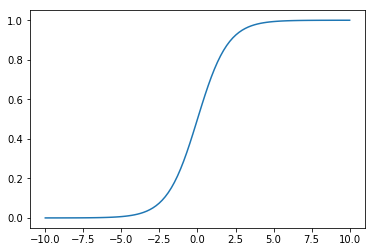

In [2]:
import numpy as np
import matplotlib.pyplot as plt
u=np.linspace(-10,10,100)
g = np.exp(u)/(1 + np.exp(u))
plt.plot(u,g)

A esta función se le conoce como **función de activación**.

Para entrenar el perceptrón es necesario definir una función de costo que penalice el modelo cuando éste realiza predicciones erróneas. Cuando la variable objetivo $t_j \in \{0,1\}$ (la predicción corresponde a un problema de clasificación), la función de costo más común, conocida como **crossentropy** está dada por:

$$J({\bf{w}})=-\frac{1}{N_s}\sum_{j=1}^{N_s} t_j\log(g({\bf{w}}^T{\bf{x}}_j)) + (1-t_j)\log(1-g({\bf{w}}^T{\bf{x}}_j))$$

Por lo tanto, la regla para actualizar iterativamente los pesos del perceptrón usando la función $J$ está dada por:

$${\bf{w}}(\tau) = {\bf{w}}(\tau-1) - \frac{\eta}{N_s}\nabla J({\bf{w}})$$

$$w_i(\tau) = w_i(\tau-1) - \frac{\eta}{N_s}\sum_{j=1}^{N_s} (g({\bf{w}}^T{\bf{x}}_j) - t_j)x_{ji}$$

donde $\eta$ es la tasa de aprendizaje y $x_{ji}$ es la $i$-ésima variable de entrada de la $j$-ésima muestra de entrenamiento.

Weights:
[[ 2.95178241e+00]
 [-5.16479601e+00]
 [-3.62895162e-03]]
Error= 0.08607879878551308


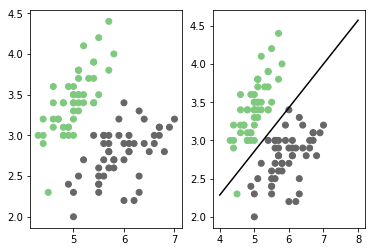

In [3]:
from local.lib.PerceptronExample import Plot_Perceptron
Plot_Perceptron()

Consideremos ahora el tipo de problemas que podremos resolver utilizando un solo perceptron.

![alt text](./imgs/ORANDXOR.png "ORANDXOR")

Como sabemos, la función XOR se puede construir a partir de funciones AND y funciones OR. De la misma forma podemos resolver el problema de la gráfica 3 utilizando la combinación de dos fronteras de decisión lineales:

![alt text](./imgs/XOR.png "XOR")

----------------------------------------------------------------------------------------------------------------------------------------------

## Perceptrón multi capa (Multi-layer perceptron -MLP)

Para resolver problemas complejos, varios perceptrones pueden ser usado de manera conjunta formando una arquitectura que se conoce como perceptrón multi capa.

<img src="./imgs/MLP_.png" alt="Multi-LayerPerceptron" width="400"/>

La salida $k$-ésima de un MLP con una capa de entrada y una capa oculta puede expresarse como:

$$
y_k({\bf{x}},{\bf{w}}) = \sigma\left( \sum_{l=1}^{M_1} w_{kl}^{(2)} h \left( \sum_{i=1}^{n} w_{li}^{(1)} x_i + w_{l0}^{(1)} \right) + w_{k0}^{(2)}\right) 
$$

donde $\sigma$ y $h$ son las funciones de activación para la capa de salida y la capa oculta respecticamente. Teniendo en cuenta que la red puede tener más de una salida $k$, la función de costo en este caso debe incluir los errores cometidos por la red para cada salida. Por ejemplo, usando una función de error cuadrático medio, la función de costo puede ser expresada como:

$$J({\bf{w}}) = \frac{1}{Ns}\sum_{j=1}^{Ns}\sum_{k=1}^{K} (y_{jk} - t_{jk})^2$$

### Algoritmo de propagación hacia atrás (Backpropagation)

El algoritmo de propagación hacia atrás es la aplicación del algoritmo de gradiente descendente a una red neuronal. La principal diferencia con el caso anterio, es el hecho de que para los pesos internos (pesos en las capas ocultas) las derivadas requieren la aplicación de la **regla de la cadena**.

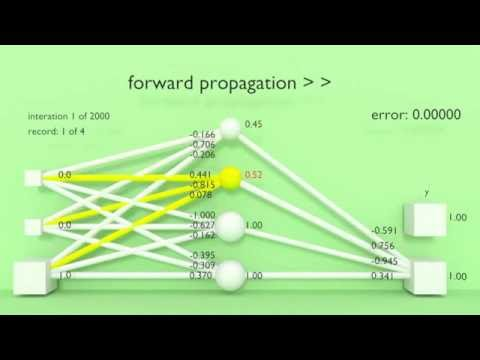

In [4]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('OwdjRYUPngE', width=700, height=500)

Si queremos echar un vistazo a la definición de las expresiones para la reestimación de los pesos, debemos primero definir algunas variables intermedias del paso "forward" de la red:
 
$$
 a_l = \sum_{i=0}^{n} w_{li}^{(1)} x_i, \;\; z_l = h(a_l)
$$

$$
 a_k = \sum_{l=0}^{M_1} w_{kl}^{(2)} z_l, \;\; y_k = \sigma(a_k)
$$

Los gradientes en la capa de salida pueden ser calculados a partir de:

$$\frac{\partial J}{\partial w_{kl}^{(2)}} = \frac{\partial J}{\partial y_k}\frac{d \sigma}{d a_k} \frac{\partial a_k}{\partial w_{kl}^{(2)}}$$

$$\frac{\partial J}{\partial w_{kl}^{(2)}} = \frac{1}{N_s}\sum_{j=1}^{Ns} (y_{jk}-t_{jk})\dot{\sigma}(a_k) z_l({\bf{x}}_j)$$

Para la capa oculta el gradiente puede ser calculado como:

$$\frac{\partial J}{\partial w_{li}^{(1)}} = \frac{1}{Ns}\sum_{k=1}^{K}\sum_{j=1}^{Ns}(y_{jk}-t_{jk})\dot{\sigma}(a_k)\frac{\partial a_k}{z_l}\frac{\partial z_l}{w_{li}^{(1)}}$$

$$\frac{\partial J}{\partial w_{li}^{(1)}} = \frac{1}{Ns}\sum_{k=1}^{K}\sum_{j=1}^{Ns}(y_{jk}-t_{jk})\dot{\sigma}(a_k)\sum_{l=0}^{M_1}w_{kl}^{(2)} \dot{h}(a_l)x_{ji}$$

Los gradientes pueden ser fácilmente extendidos para más capas debido a que siguen la misma formulación.

## Funciones de activación clásicas

### Logistic

$$
g(u) = \frac{\exp(u)}{1 + \exp(u)} = \frac{1}{1 + \exp(-u)}
$$

Derivada: $$\frac{\partial g(u)}{\partial w_i} = g(u)(1-g(u))\frac{\partial u}{\partial w_i}$$.

### Hyperbolic tangent 

$$g(u) = \frac{\exp(u) - \exp(-u)}{\exp(u) + \exp(-u)}$$

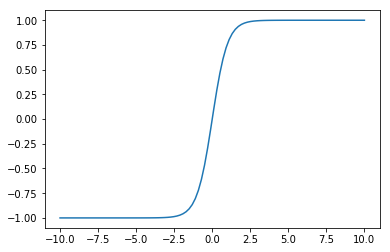

In [5]:
g = (np.exp(u) - np.exp(-u))/(np.exp(u) + np.exp(-u))
plt.plot(u,g)

Derivada: $$\frac{\partial g(u)}{\partial w_i} = (1 - (g(u))^2) \frac{\partial u}{\partial w_i}$$

### Softmax

$$g(u_k) = \frac{\exp(u_k)}{\sum_{l=1}^K \exp(u_l)}$$

Derivada: $$ \frac{\partial g(u_i)}{\partial u_j} = g(u_i)(\delta_{ij}-g(u_j))$$

$$\delta_{ij} = \left\{
                \begin{array}{ll}
                  1\;\;\;{\rm{if}}\;\;\;i=j\\
                  0\;\;\;{\rm{if}}\;\;\;i \neq j
                \end{array}
              \right. $$

### Example using a toy dataset:

(1500, 2)


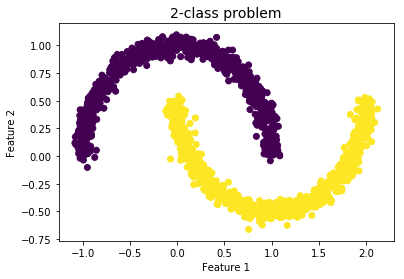

In [6]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
print(X.shape)
plt.title('2-class problem', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X[:,0], X[:,1], c=y);

In [7]:
!pip install neurolab

Epoch: 15; Error: 0.11072430296604041;
The goal of learning is reached


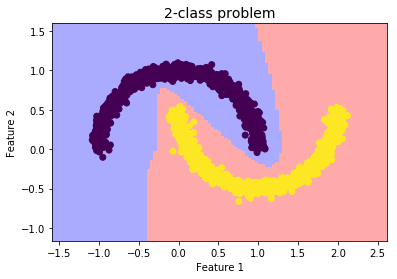

In [8]:
import numpy as np
import neurolab as nl
from matplotlib.colors import ListedColormap
# Create train samples
input = X
target = np.array(y)[np.newaxis]
target = target.T
# Create network with 2 inputs, 5 neurons in input layer and 1 in output layer
net = nl.net.newff([[X.min(), X.max()], [y.min(), y.max()]], [5, 1],  [nl.trans.LogSig(),nl.trans.LogSig()])
# Train process
err = net.train(input, target, show=15)
# Test
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA',])
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        #print([xx[1,i],yy[j,1]])
        Z[i,j]=net.sim([[xx[1,i],yy[j,1]]])
Z = np.round(Z)
plt.title('2-class problem', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.pcolormesh(xx, yy, Z.T, cmap=cmap_light)
plt.scatter(X[:,0], X[:,1], c=y);

## Batch, Minibatch y online learning

Durante el entrenamiento de un MLP las siguientes cantidades deben ser estimadas en cada iteración:

<img src="./imgs/ForwardBackward.png" alt="FBI" width="500"/>

El entrenamiento que acumula todos los errores cometidos a partir de todas las meutras de entrenamiento antes de llevar a cabo la actualización de los pesos se conoce como **Batch training**. Desafortunadamente si el número de muestras es muy grande, el algoritmo presenta problemas de computo no sólo por la cantidad de cálculos sino de memoria necesaria para realizar la multiplicación de matrices. Pero el problema más significativo es que la trayectoria del gradiente Batch tiende a estancarse en puntos silla (**saddle point**) de la función de costo.

<img src="./imgs/Optimi_surface.jpg" alt="FBI" width="500"/>

Como alternativa el entrenamiento se puede realizar propagando una sola muestra hacia adelante y realizando la actualización de los pesos a partir del error que se comete con esa muestra. Los dos pasos son repetidos para todas las muestras de entrenamiento. Esta estrategia es llamada **on-line learning** y el algoritmo resultante es llamado **Stochastic Gradient Descent (SGD)**. Debido a que el algoritmo usa una muestra aleatoria a la vez, la convergencia al óptimo es más ruidosa, pero eso ayuda al algoritmo a escapar de óptimos locales y puntos silla.

<img src="./imgs/SGD_MB.png" alt="SGD" width="600"/>

Uno de los problemas del algoritmo SGD es que requiere muchas iteraciones para converger. Por consiguiente una solución intermedia, llamada **Mini-batch gradient descent**, parte las muestras de entrenamiento en mini-batchs, y se realiza los pasos forward y backward por cada mini-batch.

1 ok
2 ok
3 ok


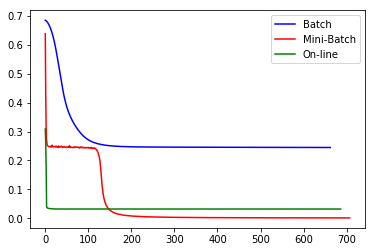

In [11]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=1500, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change = 500, max_iter=2000)
clf1.fit(X, y)
print ("1 ok")
clf2 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=50, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf2.fit(X, y)
print ("2 ok")
clf3 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=1, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf3.fit(X, y)
print ("3 ok")
plt.plot(clf1.loss_curve_,color='b',label='Batch')
plt.plot(clf2.loss_curve_,color='r',label='Mini-Batch')
plt.plot(clf3.loss_curve_,color='g',label='On-line')
plt.legend()

1 ok
2 ok
3 ok


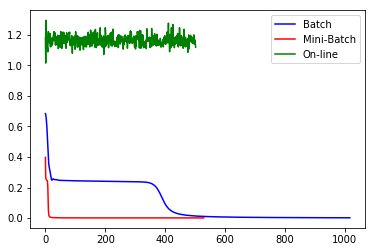

In [12]:
clf1 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=1500, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change = 500, max_iter=2000)
clf1.fit(X, y)
print ("1 ok")
clf2 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=50, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf2.fit(X, y)
print ("2 ok")
clf3 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=1, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf3.fit(X, y)
print ("3 ok")
plt.plot(clf1.loss_curve_,color='b',label='Batch')
plt.plot(clf2.loss_curve_,color='r',label='Mini-Batch')
plt.plot(clf3.loss_curve_,color='g',label='On-line')
plt.legend()

## Desventajas de las aproximaciones clásicas

**Falta de flexibilidad**

* Las aproximaciones clásicas requieren una formulación completa si se desea cambiar la función de costo o evaluar una arquitectura ligeramente diferente.
* Una nueva arquitectura requiere el cálculo de todas las formulas de re-estimación de los parámetros y no saca ventaja de herramientas de cálculo simbólico.
* Algunos frameworks clasicos soportan regularización, pero no incluyen los avances más recientes a este respecto.
* Hay nuevas funciones de activación que evitan problemas con el desvanecimiento del gradiente cuando el número de capas es grande.
* Los frameworks clasicos no usan paralelismo.
* Los frameworks clásicos no permiten el uso de estrategias más avanzadas de entrenamiento como el Transfer learning

[1] Simon Haykin, Neural Networks and Learning Machines, 3ra Edición, Prentice Hall, USA, 2009.